In [1]:
from sklearn import model_selection, datasets, neighbors

# load the data
cancer = datasets.load_breast_cancer()

# target
y = cancer.target

# features
X = cancer.data

In [2]:
# initalize the estimator
knn = neighbors.KNeighborsClassifier()

In [3]:
# grid contains k and the weight function
grid = {
    'n_neighbors': [1, 3, 5, 7],
    'weights': ['uniform', 'distance']
}

In [4]:
# set up the grid search with scoring on precsions and number of folds = 10
gscv = model_selection.GridSearchCV(estimator=knn, param_grid=grid, scoring='precision', cv=10)

In [5]:
# start the search
gscv.fit(X, y)

/Users/andrewworsley/miniconda3/envs/mrv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 3, 5, 7],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='precision', verbose=0)

In [6]:
# view the results
print(gscv.cv_results_)

{'mean_fit_time': array([0.00065789, 0.0004796 , 0.00046399, 0.0005321 , 0.00046346,
       0.00046651, 0.00047569, 0.00045073]), 'std_fit_time': array([2.01168018e-04, 4.06858633e-05, 3.52624947e-05, 1.45027331e-04,
       2.95622598e-05, 2.54670887e-05, 3.86208368e-05, 2.17260034e-05]), 'mean_score_time': array([0.0029891 , 0.00115438, 0.00223036, 0.00117283, 0.00217335,
       0.00116563, 0.00222657, 0.00117233]), 'std_score_time': array([6.89177240e-04, 1.17315257e-04, 2.09437682e-04, 1.48355635e-04,
       5.38580182e-05, 1.07813398e-04, 8.70390740e-05, 8.38524244e-05]), 'param_n_neighbors': masked_array(data=[1, 1, 3, 3, 5, 5, 7, 7],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_weights': masked_array(data=['uniform', 'distance', 'uniform', 'distance',
                   'uniform', 'distance', 'uniform', 'distance'],
             mask=[False, False, False, False, False, False, False, False],
  

In [7]:
import pandas as pd

# convert the results dictionary to a dataframe
results = pd.DataFrame(gscv.cv_results_)

# select just the hyperparameterizations tried, the mean test scores, order by score and show the top 5 models
print(
results.loc[:,['params','mean_test_score']].sort_values('mean_test_score', ascending=False).head(5)
)

                                      params  mean_test_score
4   {'n_neighbors': 5, 'weights': 'uniform'}         0.935567
6   {'n_neighbors': 7, 'weights': 'uniform'}         0.931145
5  {'n_neighbors': 5, 'weights': 'distance'}         0.930447
3  {'n_neighbors': 3, 'weights': 'distance'}         0.928843
2   {'n_neighbors': 3, 'weights': 'uniform'}         0.928524


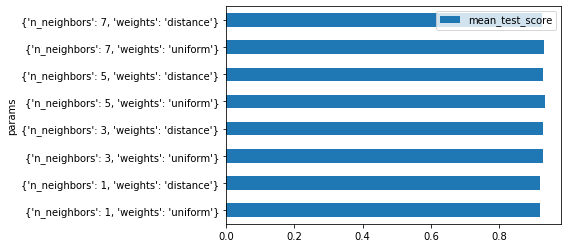

In [9]:
# visualize the result
results.loc[:,['params','mean_test_score']].plot.barh(x = 'params')